## Model building in Scikit-learn

Let's build the diabetes prediction model.

Here, you are going to predict diabetes using Logistic Regression Classifier.

Let's first load the required Pima Indian Diabetes dataset using the pandas' read CSV function. The provided corpus has been downloaded from the following link: https://www.kaggle.com/uciml/pima-indians-diabetes-database

#### Loading Data


In [6]:
#import pandas
import pandas as pd
#col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv")

In [7]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
pima.info() # output shown below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The following features have been provided to help us predict whether a person is diabetic or not:

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
- **Age**: Age (years)
- **Outcome**: Class variable (0 if non-diabetic, 1 if diabetic)

#### Data Exploration

Let us now explore our data set to get a feel of what it looks like and get some insights about it.

Let’s start by finding correlation of every pair of features (and the outcome variable), and visualize the correlations using a heatmap.

**Question**: Plot the correlation matrix using *seaborn* and the *corr* function from *Pandas*.

<AxesSubplot:>

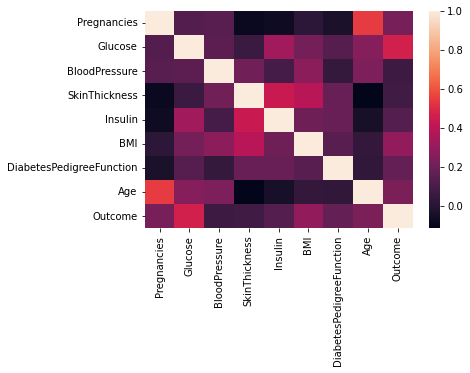

In [12]:
import seaborn as sns
########### To do ##############
corr = pima.corr()
sns.heatmap(corr)

#### Selecting Feature

Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

**Question:**: create a numpy array *pima_label* that contains the labels (column "Outcome") and a numpy array *pima_data* that contains all the input variables (all columns except "Outcome").

In [17]:
import numpy as np
########### To do ##############
pima_label = np.asarray(pima['Outcome'])
pima_data = np.asarray(pima.drop('Outcome',axis=1))

#### Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

**Question**: Let's split dataset by using function *train_test_split()* from *sklearn.model_selection*. You need to pass 3 parameters: *features*, *target*, and *test_set size* (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Break the dataset into two parts with a ratio of 75% / 25%. It means 75% data will be used for model training and 25% for model testing.

In [20]:
########### To do ##############
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
pima_data_scaled = preprocessing.scale(pima_data)

X_train, X_test, y_train, y_test = train_test_split(pima_data_scaled, pima_label, test_size=0.25, random_state=0)

#### Model Development and Prediction

**Question**: First, import the Logistic Regression *LogisticRegression* module from *sklearn.linear_model* and create a Logistic Regression classifier (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Then, train your model on the train set.

In [30]:
############# To do ################
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.get_params()
logreg.n_iter_

array([11], dtype=int32)

In [31]:
logreg.coef_

array([[ 0.28817001,  1.04158761, -0.20889697,  0.0914167 , -0.1110515 ,
         0.68152683,  0.29103829,  0.25853476]])

In [32]:
logreg.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

**Question**: Test you model on the test set and print the accuracy obtained.

In [34]:
############# To do ################
accuracy= logreg.score(X_test, y_test)
print(accuracy)

0.8020833333333334


#### Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

**Question**: Print the confusion matrix obtained using your model on the test set. You can use the function availaible in the package *metrics* from *sklearn* (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).


In [38]:
import matplotlib.pyplot as plt

############# To do ################
y_pred = logreg.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[118  12]
 [ 26  36]]


Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 118 and 36 are actual predictions, and 26 and 12 are incorrect predictions.

#### Visualizing Confusion Matrix using Heatmap



**Question**: Let's visualize the results of the model in the form of a confusion matrix with a Heatmap. You can do that using *matplotlib* and *seaborn*.

Text(0.5, 15.0, 'Predicted label')

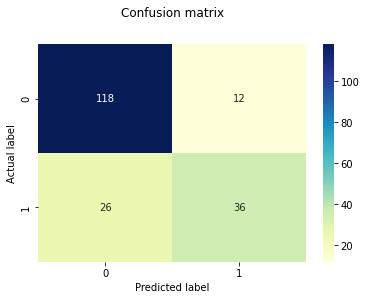

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

############# To do ################
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Confusion Matrix Evaluation Metrics

**Question**: Evaluate the model using model evaluation metrics such as accuracy, precision, and recall. You can use the functions available in the package *metrics* from *sklearn* (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [52]:
############# To do ################
metrics.accuracy_score(y_test, y_pred)
metrics.precision_score(y_test, y_pred)
metrics.recall_score(y_test, y_pred)
metrics.f1_score(y_test, y_pred)

0.6545454545454547

Well, you got a classification rate of 80%, considered as good accuracy.

**Precision** : Precision is about being precise, i.e., how accurate your model is. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)

Here, when your Logistic Regression model predict that a patient suffers from diabetes, the patient suffers from diabete 75% of the time.

**Recall** : The recall is intuitively the ability of the classifier to find all the positive samples (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html). 

Here, if there are patients who have diabetes our Logistic Regression model can identify it 58% of the time.

#### ROC Curve

Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

**Question**: Plot the ROC curve using the function available in the package *metrics* from *sklearn* (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [55]:
############# To do ################
y_pred_proba = logreg.predict_proba(X_test)[::,1]

array([0.95712473, 0.16660783, 0.08882136, 0.63610625, 0.11852005,
       0.0383383 , 0.74442451, 0.85759487, 0.40050924, 0.38618064,
       0.58446592, 0.96051216, 0.28775747, 0.18146388, 0.1261079 ,
       0.16045419, 0.857807  , 0.02506561, 0.43968066, 0.24584093,
       0.65759754, 0.40679902, 0.19083448, 0.06967946, 0.05174737,
       0.34543067, 0.04537528, 0.91016668, 0.10744831, 0.13377401,
       0.46974836, 0.25337565, 0.10145664, 0.458186  , 0.09381743,
       0.68281814, 0.45769915, 0.08767539, 0.32131067, 0.72058459,
       0.27921952, 0.21117054, 0.15502917, 0.80810366, 0.76881746,
       0.00900245, 0.08264383, 0.19865424, 0.36028841, 0.28889294,
       0.37445231, 0.17950975, 0.87569292, 0.49621025, 0.14633086,
       0.00276618, 0.06229139, 0.54509795, 0.25973394, 0.05630771,
       0.74178303, 0.47507168, 0.10038803, 0.66721592, 0.65858512,
       0.89468875, 0.70236855, 0.13837246, 0.33355092, 0.11113082,
       0.11432604, 0.34135714, 0.09934596, 0.95046039, 0.83068

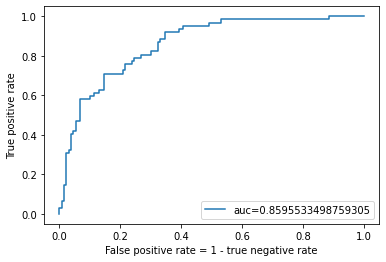

In [62]:
fpr, tpr, v = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel("False positive rate = 1 - true negative rate")
plt.ylabel("True positive rate")
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.86. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

#### Interpreting the ML Model

To get a better sense of what is going on inside the logistic regression model, we can visualize how our model uses the different features and which features have greater effect.

8
8


Text(0.5, 0, 'Importance')

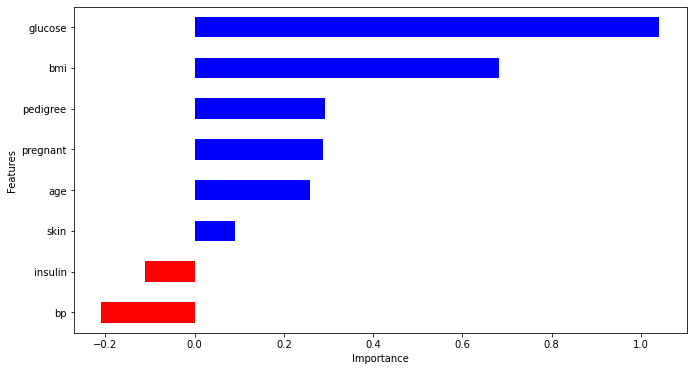

In [63]:
coeff = list(logreg.coef_[0])
#col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
labels = list(col_names[:-1]) #remove label
print(len(labels))
print(len(coeff))
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

From the above figure, we can draw the following conclusions.

    1. Glucose level, BMI, pregnancies and diabetes pedigree function have significant influence on the model, specially glucose level and BMI. It is good to see our machine learning model match what we have been hearing from doctors our entire lives!
    
    2. Blood pressure has a negative influence on the prediction, i.e. higher blood pressure is correlated with a person not being diabetic. (also, note that blood pressure is more important as a feature than age, because the magnitude is higher for blood pressure).
    
    3. Although age was more correlated than BMI to the output variables (as we saw during data exploration), the model relies more on BMI. This can happen for several reasons, including the fact that the correlation captured by age is also captured by some other variable, whereas the information captured by BMI is not captured by other variables.

Note that this above interpretations require that our input data is normalized. Without that, we can’t claim that importance is proportional to weights.